# 課題 タイタニック生存予測 ランダムフォレスト

## データ取得
https://www.kaggle.com/c/titanic/data
より,train.csvをダウンロードして、Jupyter Notebookと同じフォルダに保存しましょう。

In [1]:
ls ./input

test.csv   train.csv


## データ読み込み
pandasを使用して、ダウンロードしたcsvファイルを読み込みましょう。

In [2]:
import pandas as pd 
data_train = pd.read_csv('./input/train.csv')
data_test = pd.read_csv('./input/test.csv')

### データ確認
データを読みこむことができたら、前処理や可視化を行っていくため、データの現状を確認しましょう。

In [3]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lennon, Mr. Denis",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### sample
pandas.DataFrame.sampleを使用して、何件か、データを取得し、データを眺めていきましょう。

In [7]:
data_train.sample(n=3, random_state=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S


## 前処理について記述せよ
以下の観点をすべて含めて記述しましょう。

- 前処理とは何か
- なぜ前処理を行う必要があるのか
- 前処理は具体的に何を行うか(3つ以上記述せよ)
- 前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)

## 答え：

### 前処理とは何か
　自分の扱いたいデータを理解し、データを扱いやすい形に整形すること
 
### なぜ前処理を行う必要があるのか
　一般的に、取得したそのままのデータは構造的にも論理的にも汚く乱雑であり、モデリングや分析のアルゴリズムを施せる状態になっていない。この問題を解消するために、前処理を行う必要がある

### 前処理は具体的に何を行うか(3つ以上記述せよ)
- 『データ基本変形』： マージ、ソート、グループ化・集計、行の抽出、列の選択
- 『欠損値処理』： 欠損値を含む行・列の除去、平均値・中央値・最頻値で補完、重回帰やランダムフォレストなどの機械学習手法で補完
- 『離散化』： クラスタリングや分位点分割などによる連続値の離散化
- 『変数変換』： 対数変換、ロジスティック変換、主成分分析、変数同士の演算、クラスタリング、正規化などにより既存変数を変形し、新しい変数をつくる
- 『ダミー化』： 多項目離散値をとる列を、複数列の真偽値に変換する
- 『データの分割』： 学習用データとテスト用データを別のデータにする
 
### 前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)
- 『データ基本変形』： 不要な情報を除去できる、単一または少数のデータソースに変換できる、データを絞り込める
- 『欠損値処理』： 欠損値があることで発生する分析の手間を減らせる、分析結果のブレやバイアスを減らせる
- 『離散化』：　離散値を扱う分析モデルを適用できる、 連続値をグループで区分・整理できる
- 『変数変換』： より分析にクリティカルな特徴量をつくり出せる、分析結果や予測の精度を向上できる
- 『ダミー化』： ダミー化・行列化することで、多値離散値をうまく扱えない分析手法にも対応できる
- 『データの分割』： モデルが過学習・未学習になっていないかどうかを検証できる

## 2/前処理について記述せよ
前処理について記述せよの調査により、データを確認する際にどのような点を見るとよいか、3つ以上記述せよ。

## 答え：
- 問題解決につながる分析手法を予め複数検討しておき、それらを適用して成果を上げるためにはどのように前処理するべきか、という点
- 入手できたデータセットが複数ある場合、少数に統合できないか。また、無駄な列や行を除去できないか、冗長な列や行を統合できないか、という点
- 最大値、最小値、平均値、分散、などの統計情報から、欠損値、外れ値、異常値、偏った値などを検知できないか、という点
- 表記揺れをはじめとする作り込まれた誤りが混入されていないか、という点
- 繰り返されているパターンや、互いに強い相関関係を示す変数がないか、という点

## 前処理を行う
以下のコードを元に前処理を行いましょう。

```前処理1```

In [8]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


```前処理2```

In [9]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


## 前処理の内容について記述せよ
以下の観点をすべて含めて記述しましょう。
```simplify_ages
simplify_cabins
simplify_fares
format_name
drop_features
encode_features```
- 以上のメソッドがそれぞれ何を行っているか記述せよ
- それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)

## 答え：
### <前処理1について>  
　学習データとテストデータの両方について、以下のように前処理を行なっている。
 
- simplify_ages関数で、Age列の欠損値を'-0.5'で埋めてから、Age列の値を指定の区分でグループ分けし、それぞれのグループに該当する数値に['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']のカテゴリー値を割り当て、Age列の中身ごと入れ替えている。これにより、Age列の連続値を離散値に変換してデータの種類を減らし、後工程におけるデータ操作・データ分析の手間や処理量、過学習に陥る可能性を軽減できるメリットがある  


- simplify_cabins関数で、Cabin列の欠損値を'N'で埋めてから、Cabin列の各文字列の先頭１文字と元の文字列を入れ替えている。これにより、複数文字だったデータ量を1文字まで削減し、また、データの種類を減らし、後工程におけるデータ操作・データ分析の手間や処理量、過学習に陥る可能性を軽減できるメリットがある  


- simplify_fares関数で、Fare列の欠損値を'-0.5'で埋めてから、Fare列の値を指定の区分でグループ分けし、それぞれのグループに該当する数値に['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']のカテゴリー値を割り当て、Fare列の中身ごと入れ替えている。これにより、Fare列の連続値を離散値に変換してデータの種類を減らし、後工程におけるデータ操作・データ分析の手間や処理量、過学習に陥る可能性を軽減できるメリットがある  


- format_name関数で、Name列の各文字列をスペースで分割してリストに格納。リストの1番目の要素と2番目の要素を、それぞれ'Lname'、'NamePrefix'という新しい列にまとめて、データセットに加えている。これにより、元のName列の各名前の文字列から、'苗字'と'称号'の文字列を機械的に取り出すことができる。Name列から、これら２つだけを取り出したので、データ量とデータの種類を減らして後工程におけるデータ操作・データ分析の手間や処理量、過学習に陥る可能性を軽減できるメリットがある。それに加えて、'苗字'を元に家族をグルーピングしたり、'称号'を用いて社会的地位をグルーピングしたりといった、後の分析に使える新しい特徴量を取り出せるというメリットがある  


- drop_features関数で、データセットから['Ticket', 'Name', 'Embarked']の３つの列を削除している。これにより、分析に不要と判断した情報を削除して、後工程におけるデータ操作・データ分析の手間や処理量を軽減できるメリットがある。それに加えて、これらの値が分析結果にノイズをもたらす可能性を排除できるというメリットがある  


### <前処理2について>  
　学習データとテストデータの両方について、以下のように前処理を行なっている。
- encode_features関数で、データセットの['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']の６つの列について、文字列や文字で示されていたカテゴリー値を、数値(ラベル)で置き換えている。これにより、データセットについて、文字や文字列を扱えない分析手法でも適用できるようになるというメリットがある。また、文字列から数値への変換によるデータ量の削減により、後工程におけるデータ操作・データ分析の手間や処理量、過学習に陥る可能性を軽減できるメリットがある

## モデル選択について記述せよ
今回使用するモデルは決定していますが、モデル選択をする際の演習を行いましょう。

- 今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。
- その手法の概要をそれぞれ記述せよ
- その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ

## 答え：
### ①k近傍法
#### 概要
　分類対象について、その近くにある（近傍の）分類済み対象群の個数を元に分類する。すなわち、k 個の最近傍の分類済み対象群で最も多い分類を、対象の分類に割り当てる。対象は、特徴空間におけるベクトルで示される。分類済み対象群とは、分類ラベルがつけられた特徴空間におけるベクトル群である。近さを測る距離は一般にユークリッド距離が用いられる
#### 長所
- 距離と近傍のラベルのみにより分類できるため、直感的に理解しやすい
- 連続値をとる変数についても適用可能である
- データ量が無限に近づくほど、分類精度が高くなる

#### 短所
- 原理的に、個体数が最も多い分類が採用されやすい
- ノイズや不適切な特徴量の影響を受けやすい
- 高次元空間は広大になるという所謂「次元の呪い」故に、次数が大きい場合には膨大な数の分類済み対象が必要になる

### ②XGBoost
#### 概要
　XGBoostとは，Gradient BoostingとRandom Forestsを組み合わせたアンサンブル学習である。
Boosted treesの予測精度はRandom Forestsよりも向上するが、チューニングが必要なパラメータが複数存在する。一方、Random Forestsはチューニングが不要だが、学習データに依存しやすく、過学習となりやすい

#### 長所
- 高いスケーリング性を持つend-to-endなtree boostingシステムをもつ
- 値が欠損、0が多い、one-hot encodingなどの特殊な処理を施したデータなどについて，予め分岐の方向を決めるアルゴリズムを導入している
- CPU外(out-of-core)での学習が可能であり、計算速度が高速化されている

#### 短所
- 複数のパラメータ調整によるチューニングが必要であり、最適化はグリッドサーチやCross Validationを複数行う
- 汎化能力を上げるために、学習率(XGBoostパッケージではパラメータeta)を下げていき、その都度最適化を行う
- 線形分離可能パターンに対してはうまく機能しない可能性が高い

### ③パーセプトロン
#### 概要
　入力、中間、出力の3層からなるニューラルネットワークの手法。バックプロパゲーションを用いた学習が一般的。複雑な表現を再現できるが、その分過学習もしやすい。ディープラーニングが登場する前の代表的なニューラルネットワークの手法

#### 長所
- シンプルなネットワークでありながら学習能力を持つ
- 多層パーセプトロンは、誤差逆伝播学習法で学習させることで、線型分離不可能な問題が解けるように、単純パーセプトロンの限界を克服した
- 多層パーセプトロンは適応度近似のような極めて複雑な問題に対する近似解をしばしば与える

#### 短所
- 単純パーセプトロンでは、線形分離可能なものしか学習できない
- 階層型ネットワークのパーセプトロンでは、階層が少ないと解けない問題もある
- 複雑なネットワークはうまく学習するのがとても難しい。理論的に優れた性能が発揮できるということはわかっていても、そもそも学習ができない

### ④サポートベクターマシーン(SVM)
#### 概要
　線形入力素子を利用して 2 クラスのパターン識別器を構成する手法である。訓練サンプルから、各データ点との距離が最大となるマージン最大化超平面を求めるという基準（超平面分離定理）で線形入力素子のパラメータを学習する

#### 長所
- 非線形分類問題にも優れた性能を発揮することがわかり、近年特に注目を集めている
- 「マージン最大化」というアイデア等で汎化能力も高め、現在知られている方法としては、最も優秀なパターン識別能力を持つとされている
- 局所解収束の問題が無い

#### 短所
- データを2つのグループに分類する問題には優れているが、多クラスの分類にそのまま適用出来ない
- カーネル関数の選択の基準も無い等の課題も指摘されている
- 計算量が多い


## モデル選択の基準
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること(他の参考資料でも構わない、その場合参考資料を明記すること)
- https://docs.microsoft.com/ja-jp/azure/machine-learning/machine-learning-algorithm-choice
- https://datumstudio.jp/blog/機械学習におけるモデルの選択方法について

## 答え：
- 精度について、可能な限り最も正確な回答を得ることが常に必要であるとは限らない。 使用目的によっては、近似で十分な場合がある。 その場合は、より大まかな方法を使用することで、処理時間を大幅に削減できることがある。 近似手法のもう 1 つの利点は、一般に 過学習が回避される傾向があることである


- トレーニング時間について、モデルのトレーニングに必要な分数または時間数は、アルゴリズムによって大きく異なる。 通常、トレーニング時間は精度と密接に関係する。さらに、一部のアルゴリズムは他よりデータ ポイントの数に大きく影響を受ける。 時間が限られている場合、アルゴリズムの選択を左右することがある。データセットが大きい場合は特にそうである


- 線形アルゴリズムは最初に使用する方法として非常に一般的である。 アルゴリズムが簡単で、速くトレーニングできる傾向がある


- パラメーターの数について、パラメーターは、アルゴリズムを設定するときに使用する。 エラーの許容範囲や反復回数などのアルゴリズムの動作に影響を与える値、またはアルゴリズムの動作のバリエーションのオプションである。 アルゴリズムのトレーニング時間と精度は、設定の適切さに大きな影響を受けることがある。 通常、パラメーター数の多いアルゴリズムは、適切な組み合わせを見つけるのに多くの試行錯誤が必要である


- 分類や回帰問題の手法に着目するとき、モデル選択の評価として重要なのは「予測精度」と「中身のわかりやすさ」の2点である。「予測精度」は学習から得られたモデル(近似関数)が判別や回帰の値をどれだけ正確に出力するかという指標で、学習データのみ精度が高くその他で精度が低い過学習の問題を解消できるならば非線形性を有する手法ほど精度が高い傾向にある。一方「中身のわかりやすさ」は、モデルをひとつの入出力器とみなした場合、入力に相当する説明変数と出力に相当する目的変数(予測値)間の関係が陽に解釈できるかどうかに依存する。入出力の関係性がパラメータなどを通して理解し易いならば、モデルはホワイトボックスとして因果類推に役立つ。このように、分類や回帰問題に対する機械学習の手法は「予測精度」と「中身のわかりやすさ」の基準において各々が長所と短所を有す。したがって分析の目的に応じて手法の特徴を鑑みモデルを選択することが肝要である


## モデル選択におけるデータ可視化
モデルを選択する際にデータ可視化を行い、データの特徴を把握した上で、モデルを選択することができます。今回は、その例を体験してみましょう  
```import```

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

```barplot```

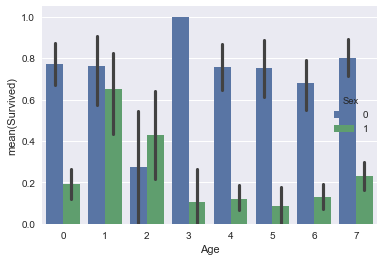

In [11]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train)

```pointplot```

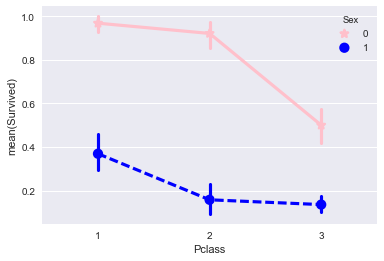

In [12]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);

## データ可視化の結果について考察せよ
以下の観点をすべて含めて記述しましょう。
- 上記の２つの可視化から分かったことについて考察せよ。
- 上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか

## 答え：

### 上記の２つの可視化から分かったことについて考察せよ。
　『barplot』より、'Child'の年齢区分を例外としても、全体的に女性の生存率が男性よりも高い。そして'Baby'は男女生存率がどちらも高い。'Child'は男女生存率の高低が全体と逆転している。これらのことから、ほとんどの年齢で女性が優先的に避難・救助されたということ、幼子と子供は男女関係なく優先的に避難・救助されたということが考えられる　　

　『pointplot』より、どの'Pclass'であっても、女性の生存率が男性よりも高い。また、男女ともに'Pclass'が高いものほど生存率が高い。これらのことから、男女とも'Pclass'の高いものから優先的に避難・救助されたということが考えられる　　

　上記のことから、男女を示す変数'Sex'、年齢区分を示す変数'Age'、乗客の階級を示す変数'Pclass'の３つの変数が、生存予測にあたって影響度が大きい変数と考えられる
 
### 上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか
　生存予測にあたって影響度が大きいと考えられる３つの変数は、実質的に名義尺度であり、演算に意味を持たない離散値である。このことから、分類のモデルであっても連続値を入力とするロジスティック回帰などのモデルは馴染まないと考えられる。また、これら３つの変数が取りうる値はそれぞれ２値、６値、３値とパターンが少ないので、複雑で自由度の高いモデルを選択する必要はないと考えられる

## データセットの分割
それでは、テストデータの作成を行いましょう。学習データとテストデータの比は8:2とします。

In [13]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## ランダムフォレストについて記述せよ
今回は、ランダムフォレストという手法を使用します。

以下の観点をすべて含めて記述しましょう。

- 決定木とはどのような手法か
- ランダムフォレストとはどのような手法か
- ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
- 今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ

## 答え：
### 決定木とはどのような手法か
　決定木とは予測モデルであり、ある事項に対する観察結果から、その事項の目標値に関する結論を導く。内部節点は変数に対応し、子節点への枝はその変数の取り得る値を示す。アルゴリズムは、目的変数と説明変数のデータから木構造の分類器を生成し、トップダウンに、再帰的にデータを分割していく。実数値をとる関数の近似に用いる場合には回帰木、分類に用いる場合には分類木と呼ばれる
 
### ランダムフォレストとはどのような手法か
　ランダムフォレストは、決定木を複数組み合わせて、各決定木の予測結果を多数決することによって結果を得る、分類、回帰、クラスタリングに用いられるアンサンブル学習である。それぞれの決定木で使う特徴量をランダムに選択することで各決定木の予測結果をバラつかせ、過学習に陥り易いという決定木の弱点を補っている

### ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。
#### 長所
- 正規化・標準化を考える必要が無く、連続値・離散値が混在していても使える
- 決定木の予測精度を維持したままで、過学習を起こしにくい
- 特徴量の重要度を学習とともに計算できる

#### 短所
- 原理的に、内部の決定木が種類・深さともに多様になるため「中身の分かりやすさ」が確保しにくい
- テキストデータなど、高次元で疎なデータに対してはうまく機能しない傾向にある
- 線形モデルに比べて、メモリ消費が多い

### 今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ
　今回の目的は、タイタニックの乗客データから事故における生存予測を行う分類問題である。学習データが８９１件と少なく、年齢や料金などの連続値や、名前や客室名などの多値離散値が含まれていることから、採用した分類モデルが過学習になりやすいデータであるといえる。ランダムフォレストは、連続値・離散値をともに扱えることに加えて、決定木の予測精度を維持したまま過学習を起こしにくいという長所があるため、この懸案に対処できることになる。また、特徴量の重要度を計算できることから、このような事故において生死を分ける要因を突き止めて、再発防止のための教訓を得ることもできるだろう。こうした理由により、ランダムフォレストの手法はタイタニック生存予測に適していると考える

## 学習
ランダムフォレストを使用して、学習を行いましょう。  
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

## accuracyを求めよ
学習が終わったら、accuracyを求めましょう。

In [15]:
print(clf.score(X_train, y_train))

0.977528089888


## 精度を高める
この課題では75%以上の精度が出ていた場合、合格とします。

In [16]:
print(clf.score(X_test, y_test))

0.776536312849


## ハイパーパラメータについて
- ハイパーパラメーターとは何か
- ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
- 記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）  

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### ハイパーパラメーターとは何か
 モデルが学習を行う際に、人間が予め設定しておかなければいけないパラメータのこと。機械学習が自動で決められる範囲の外のパラメータのため、"ハイパー"が冠される。調整については、先例や経験に基づいて試行錯誤していく手動調整方法と、ランダムにパラメータを試していくランダムサーチやパラメータ候補を総当たりで調べるグリッドサーチなどの自動調整方法がある

### ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ
- 『n_estimators』：多数決判断に用いる決定木をいくつ作るか
- 『max_features』：特徴量をいくつまで用いるかの最大数
- 『max_depth』：多数決判断に用いる決定木の深さの最大数
- 『min_samples_split』：多数決判断に用いる決定木の葉ノード内で分割されるサンプルの最小数

### 記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ
- 『n_estimators』：整数値（その数がそのまま採用される）。デフォルト値は１０
- 『max_features』：整数値（その数がそのまま採用される）、小数（それと特徴量数を乗算した数が採用される）、“auto”・“sqrt”（特徴量数の平方根が採用される）、“log2”（２を底とする特徴量数の対数が採用される）、None（特徴量数がそのまま採用される）。デフォルト値は“auto”
- 『max_depth』：整数値（その数がそのまま採用される）、None（葉ノードの全ての要素が完全に分類されるか、min_samples_splitで指定された数まで分類されるまで深くなる）、デフォルト値はNone
- 『min_samples_split』：整数値（その数がそのまま採用される）、小数（それとサンプル数を乗算した数が採用される）。デフォルト値は２

## チューニング
思うような精度が出ていない場合、チューニングを行う必要があります。
今回はハイパーパラメーターを変更し、チューニングを行いましょう。
以下の観点からチューニングを複数行い、精度の向上を目指します。

- 'n_estimators': [4, 6, 9],
- 'max_features': ['log2', 'sqrt','auto'],
- 'criterion': ['entropy', 'gini'],
- 'max_depth': [2, 3, 5, 10],
- 'min_samples_split': [2, 3, 5],
- 'min_samples_leaf': [1,5,8]  

上記は、それぞれのハイパーパラメーターの例を示しています。’n_estimators’であれば、4,6,9を試してみましょう。

In [17]:
list = []
for h in [4, 6, 9]:
    for i in ['log2', 'sqrt','auto']:
        for j in ['entropy', 'gini']:
            for k in [2, 3, 5, 10]:
                for l in  [2, 3, 5]:
                    for m in [1,5,8]:
                        clf = RandomForestClassifier(random_state=0, 
                                                     n_estimators=h, max_features=i, criterion=j, 
                                                     max_depth=k, min_samples_split=l, min_samples_leaf=m)
                        clf.fit(X_train, y_train)
                        list.append([h, i, j, k, l, m, clf.score(X_train, y_train), \
                                     clf.score(X_test, y_test)])

pd.DataFrame(list).sort_values(by=7, ascending=False).head()

,0,1,2,3,4,5,6,7
123,4,sqrt,gini,3,5,1,0.837079,0.854749
47,4,log2,gini,3,2,8,0.844101,0.854749
53,4,log2,gini,3,5,8,0.844101,0.854749
52,4,log2,gini,3,5,5,0.817416,0.854749
51,4,log2,gini,3,5,1,0.837079,0.854749


## 検証について記述せよ
機械学習で思うようなAccuracyを求めることができたら、検証を行いましょう。
以下の観点をすべて含めて記述しましょう。
- 検証は何か
- なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
- 主な検証方法について2つ以上記述せよ

## 答え：
### 検証は何か
　モデルが過学習または未学習に陥っていないか、モデルの予測値と実際値の乖離具合がどうなっているか、確認し対策するための工程である

### なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)
　分類問題では、必ず２つ以上の分類先がある。つまり、２種類以上の予測値を立てて実際値と比較するのである。Accuracyは(予測が○)で(実際も○)と、(予測が✖️)で(実際も✖️)の２パターンを問題にした評価方法であり、過学習と未学習の検知からモデルの汎化能力を測ることはできる。  
　しかし、ここでは、(予測が○)で(実際が✖️)と、(予測が✖️)で(実際が○)という２パターンも捉えなければ、予測値vs実際値の二軸での評価として不十分である。具体的には、後述の２パターンも問題として前述の２パターンと混合し、予測値と実際値の乖離具合がどうなっているかを確認する必要がある。  
　上述したように、予測値vs実際値の二軸で、４パターン以上の予測値と実際値の乖離具合を確認した上で、各種パラメータを調整したり適用モデルを変えてみるなどの判断を行い、汎化能力と予測精度をより一層向上させる工夫ができるような検証にしなければならない。  
　以上により検証を行うことは必要で、Accuracyだけでは不十分である

### 主な検証方法について2つ以上記述せよ
- 『ホールドアウト法』は、元のデータセットを学習データとテスタデータに分割し、学習データセットはモデルの学習に使用され、テストデータセットはモデルの性能を評価するために使われる。学習データセットとテストデータの分け方によって性能評価が左右されやすい


- 『k分割交差検証』は、データをK個に分割する。そして、そのうちの1つをテストデータとし、残る K−1 個のデータを学習データとする。この際、K個のデータ分割はランダムになる。そして、データ分割が完了したら、実際にK-1のデータセットで学習を行い、1つに分割されたテストデータでテストを行う。この学習、テストの作業を分割されたK個のそれぞれのデータの組み合わせに対してK回繰り返す。最後にそれぞれの回で導き出した精度の平均値をもって性能評価とする

## KFoldについて記述せよ
今回はKFold(K-分割交差検証)を使用して、検証を行います。
以下の観点をすべて含めて記述しましょう。

- K-分割交差検証について説明せよ
- K-分割交差検証はデータセットを何個に分割するか
- データセットを分割する際、その個数はどのように考えると良いか
- K-分割交差検証は何回の検証を行うか
- K-分割交差検証の結果は、最終的にどのように求められるか

### K-分割交差検証について説明せよ
　手許のデータのうち、いくらかを学習データ、残りをテストデータにして性能評価を行う検証方法

### K-分割交差検証はデータセットを何個に分割するか
データをk個に分割する

### データセットを分割する際、その個数はどのように考えると良いか
十分な数のデータがある場合には、k=5, 10程度にすることが一般的であり、データが少ない場合には、k=全件として性能評価の品質確保を図る

### K-分割交差検証は何回の検証を行うか
そのk通りの訓練およびテストを行う

### K-分割交差検証の結果は、最終的にどのように求められるか
各回の性能評価結果の平均値をもって、最終的な性能評価とする

## KFoldを実施する
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
sklearn.model_selection.KFoldを使用して、KFoldを実施しましょう
## Kfoldの結果を確認する
Kfoldの結果(Mean Accuracy)が75%以上になっていれば成功です。
そうでなければ、再度モデルのチューニングを行いましょう。

In [18]:
import numpy as np
from sklearn.model_selection import KFold

# 改めてデータセットをつくる
X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

# 配列化する
mX = X.as_matrix()
my = y.as_matrix()

# 先述の「チューニング」でaccuracyが高かったハイパーパラメータで、
# ランダムフォレストのインスタンスをつくる
clf = RandomForestClassifier(random_state=0, 
                             n_estimators=4, 
                             max_features='log2', 
                             criterion='gini', 
                             max_depth=3, 
                             min_samples_split=5, 
                             min_samples_leaf=8)

# k = 10 でKfold
kf = KFold(n_splits=10, random_state=0, shuffle=True)

# Kfoldで分割したインデクスでデータを切りわけ、
# 学習データで学習、テストデータでAccuracy算出、リストに格納
acc_list = []
for train_index, test_index in kf.split(X):
    clf.fit(mX[train_index], my[train_index])
    acc_list.append(clf.score(mX[test_index], my[test_index]))

# Accuracyの平均を出力
print(sum(acc_list)/len(acc_list))

0.779937578027


## どの特徴量が重要であったかを調査する
sklearnでランダムフォレストを実装すると用意にどのどの特徴量が重要であったかを判明させることができます。
feature_importances_メソッドを使用して、判明させましょう。

In [19]:
pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['important']).\
sort_values(by='important', ascending=False)

,important
Sex,0.389816
Cabin,0.238995
NamePrefix,0.146130
Pclass,0.115397
SibSp,0.044348
Lname,0.026112
Age,0.023481
Parch,0.015721
Fare,0.000000
